<a href="https://colab.research.google.com/github/vnsh69/projects-ML-DL/blob/main/emotion_decetor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
#072d868166a63c90afdddaef090603b0
#vanshvisariya

In [3]:
od.download("https://www.kaggle.com/datasets/msambare/fer2013/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vanshvisariya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:03<00:00, 19.2MB/s]


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [11]:
class_name = ['angry','disgust','fear','happy','neutral','sad','surprise']

Image shape: (48, 48)


dtype('uint8')

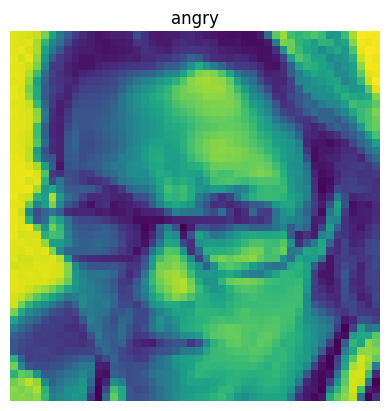

In [12]:
img=random_image(target_dir="fer2013/train/", target_class="angry")
img.dtype

Image shape: (48, 48)


array([[ 48,  41,  47, ...,  77, 190, 193],
       [ 48,  42,  46, ...,  55, 174, 197],
       [ 47,  35,  41, ...,  40, 161, 203],
       ...,
       [168, 180, 177, ..., 162, 183, 212],
       [166, 181, 181, ..., 161, 188, 215],
       [167, 179, 179, ..., 158, 192, 218]], dtype=uint8)
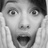

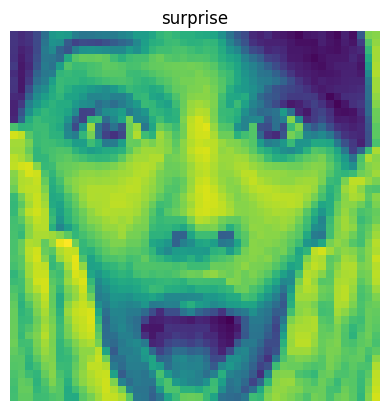

In [14]:
random_image(target_dir="fer2013/train/", target_class="surprise")

Image shape: (48, 48)


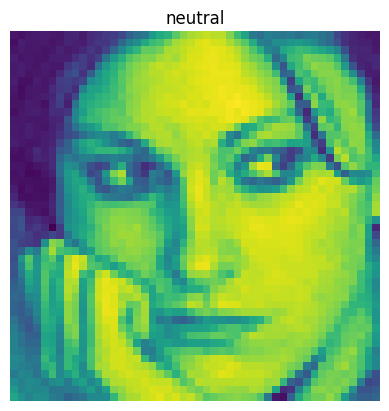

In [16]:
img=random_image(target_dir="fer2013/train/", target_class="neutral")

**note:-** the size of all the images is same , which is 48*48
also the images are in black and white

### data augmentation

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)


In [18]:
train_data_augmented = train_data.flow_from_directory('fer2013/train/',
                                                      target_size=(48, 48),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      shuffle=True)

test_data_augmented = test_data.flow_from_directory('fer2013/test/',
                                                    target_size=(48, 48),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### using conv layers

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D

In [28]:
model = Sequential([
    Conv2D(256, (3,3), activation='relu',padding="same", input_shape=(48,48,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu',padding="same"),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    Conv2D(32, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu',padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu',padding="same"),
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 32)            │           9,2

 Total params: 1,751,783 (6.68 MB)

 Trainable params: 1,750,759 (6.68 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [29]:
history = model.fit(train_data_augmented,
                            steps_per_epoch=len(train_data_augmented),
                            epochs=25,
                            validation_data=(test_data_augmented),
                            validation_steps=(len(test_data_augmented)))

Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 68s 61ms/step - accuracy: 0.2585 - loss: 1.7906 - val_accuracy: 0.3412 - val_loss: 1.6658
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.3639 - loss: 1.6122 - val_accuracy: 0.4225 - val_loss: 1.4968
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.4137 - loss: 1.4984 - val_accuracy: 0.4542 - val_loss: 1.4220
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.4545 - loss: 1.4076 - val_accuracy: 0.4918 - val_loss: 1.3129
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.4906 - loss: 1.3311 - val_accuracy: 0.5067 - val_loss: 1.2818
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.5207 - loss: 1.2704 - val_accuracy: 0.5315 - val_loss: 1.2131
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.5258 - loss: 1.2343 - val_accuracy: 0.5113 - val_loss: 1.2649
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5421 - loss: 1.2075 - 

In [30]:
model.evaluate(test_data_augmented)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6052 - loss: 1.0504


[1.0434414148330688, 0.6103371381759644]

In [ ]:
model.evaluate(test_data_augmented)

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6304 - loss: 0.9922


[0.9854505658149719, 0.6315129399299622]

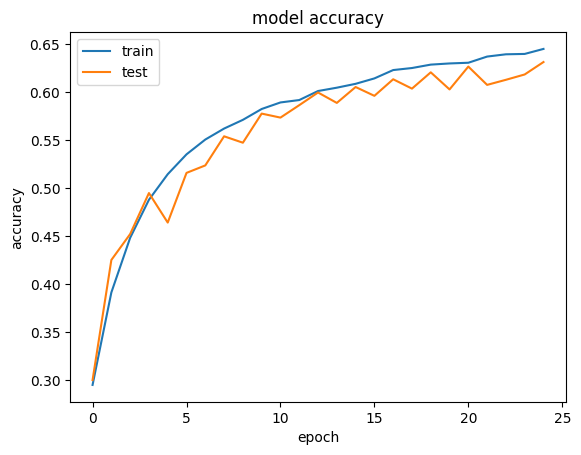

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

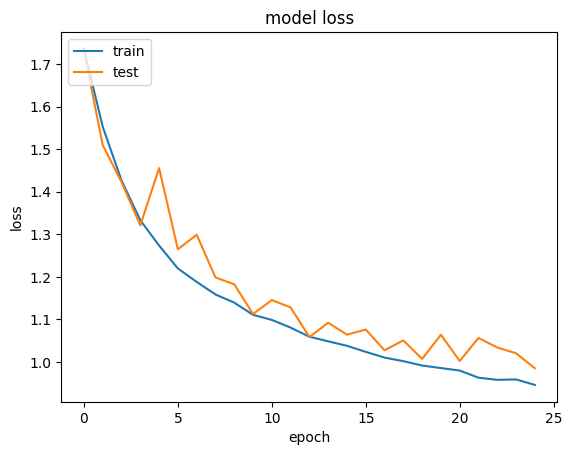

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### trying emotion decetion using transfer learning

In [20]:
from tensorflow.keras.applications import ResNet50V2

In [22]:
num_classes = 7

base_model = ResNet50V2(
    weights='imagenet',        # Load weights pre-trained on ImageNet.
    include_top=False,         # Do not include the ImageNet classifier at the top.
    input_shape=(48,48,3)
)

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

for layer in base_model.layers[-10:]:  # Unfreeze last 10 layers
    layer.trainable = True

# Create a new model on top of the base model
inputs = tf.keras.Input(shape=(48,48,3))
# Set training=False to avoid updating BatchNorm statistics of the base model
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Reduce each feature map to a single value
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                # Add dropout for regularization
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # New classifier head

# Combine the inputs and outputs into a new model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 2, 2, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,747,015 (94.40 MB)

 Trainable params: 4,598,279 (17.54 MB)

 Non-trainable params: 20,148,736 (76.86 MB)

In [23]:
resnet_history =  model.fit(train_data_augmented,
                            steps_per_epoch=len(train_data_augmented),
                            epochs=20,
                            validation_data=test_data_augmented,
                            validation_steps=len(test_data_augmented)
                            )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 66ms/step - accuracy: 0.2699 - loss: 1.8237 - val_accuracy: 0.3860 - val_loss: 1.5975
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.3634 - loss: 1.6248 - val_accuracy: 0.4170 - val_loss: 1.5376
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.3737 - loss: 1.5809 - val_accuracy: 0.4129 - val_loss: 1.5217
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.3968 - loss: 1.5482 - val_accuracy: 0.4376 - val_loss: 1.4786
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4122 - loss: 1.5255 - val_accuracy: 0.4322 - val_loss: 1.4875
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4183 - loss: 1.4998 - val_accuracy: 0.4437 - val_loss: 1.4575
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4321 - loss: 1.4762 - val_accuracy: 0.4521 - val_loss: 1.4630
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.4437 - loss: 1.4646 - val_accurac

In [24]:
model.evaluate(test_data_augmented)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4745 - loss: 1.4086


[1.41656494140625, 0.4731122851371765]

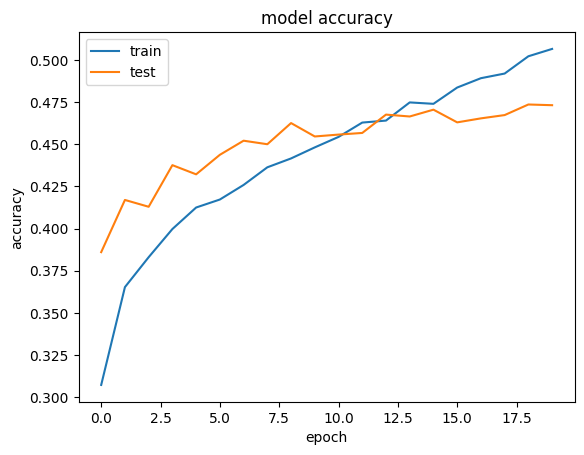

In [25]:
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

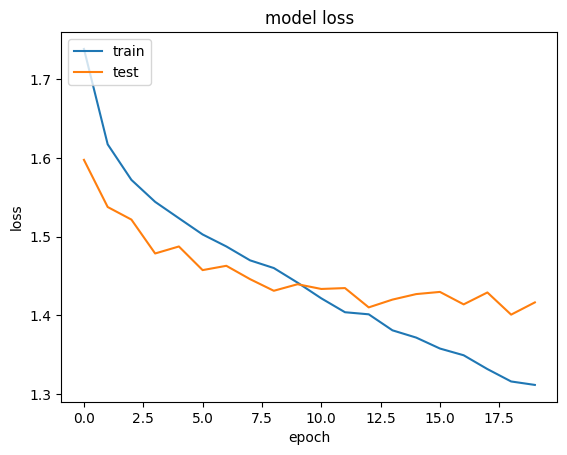

In [27]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')